<a href="https://colab.research.google.com/github/JoshKonoff/TensorFlow_FashionCompanyForcasting/blob/main/neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Introduction to neural network classification with TensorFlow

#In this notebook we're going to learn how to write neural networks for classification challenges

#A classification is where you try to classify something as on thing or another

#A few types of classification problems:
# Binary classification
# Multiclass classification
# Multilabel classification

In [2]:
#Creating data to view and fit
#Warm up

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000


### Make circiels is a simple toy dataset to visualize clustering and classification algorithms
# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42
                    )

In [4]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
#From the cell above it looks binary

In [7]:
import pandas as pd

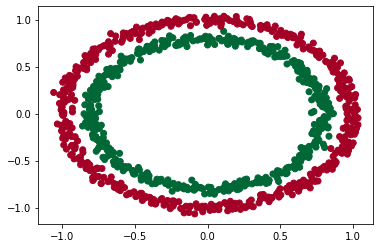

In [8]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn);

### Answer the question, what does this show???

In [9]:
#Check the shapes of our features and labels

X.shape, y.shape   #Features shape and lables shape

#X shape a shape of 2 because there are 2 samples
#y doesn't have a second dimension

((1000, 2), (1000,))

In [10]:
#How many samples we're working with:
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
## Steps in modelling

#The steps in modelling with TF are typically

# Create or import a model
# Comple the model
# Fit the model
# Evaluate the model
# Tweak
# Evaluate

In [13]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API - create the simplest one - 1 Dense layer
model_1 = tf.keras.Sequential([
                   tf.keras.layers.Dense(1)            

])

# Complile the model - here's where it going to be different - here we'll refer to chart on Binary Classification (it's red or blue dots, so we know it's binary classification)- Loss function and Optimizer
model_1.compile(loss='BinaryCrossentropy',
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy']
)
#'accuracy' out of 100 examples, how many did our model get right? What percentage?

#3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1000us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 928us/step - loss: 0.6942 - accuracy: 0.4830


In [14]:
#Our accuracy is 48%
#Out of 100 examples, our model only gets 48 right

In [15]:
#How might we improve our model?

In [16]:
#Let's look into our bag of tricks and see how we can improve our model.

# 1. Create our model - we might want to add more layers or increase the number of hidden units within a layer
# 2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
# 3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for later)

In [17]:
# B/c they're changeable, they are called hyperparameters


# Deep learning = trying things and see if they work

In [18]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), #added 100 dense neurons
                               tf.keras.layers.Dense(10),   #add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
                               
                               ])

#2. compile our model

model_3.compile(loss='BinaryCrossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy']
)

model_3.fit(X, y, epochs=100, verbose=0)

In [19]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [20]:
#Still only getting 50% accuracy even after our new tricks

In [21]:
#Let's visualize some of the predictions that our model is making

In [22]:
#To visualize our model's predictions, let's create a function called 'plot_decision_boundary.()' - where does the model think the boundary is between red and blue dots?
#This function will take in a trained model, features, (X) and labels (y)
#Create a meshgrid (numpy) of the different X values
#Make predictions across the meshgrid
#Plot the predictions as well as a line between zones (where each unique class falls)


In [23]:
import numpy as np

#Plots the decision bounary created by a model predicting on X.
def plot_decision_boundary(model, X, y):
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  #X[:, 0].min() = the 0th axis - the minimum
  # subtracting and adding 0.1 to give ourselves a little margin
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  #index on 1 to get the y axis
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together
  
  # https://numpy.org/doc/stable/reference/generated/numpy.c_.html


  #Make Predictions
  y_pred = model.predict(x_in)

  # Check for multi-class (we're working on binary here, so we don't need to, but this will make our function usuable if we did have red, green and blue circles instead of just red and green)
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #We're reshaping it to the same as xx above
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    #Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu )  #s=40 is our marker size
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


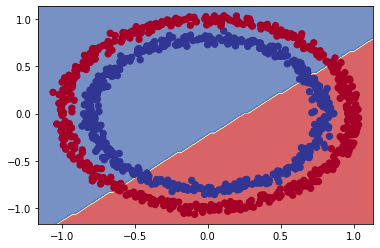

In [24]:
# Check out the predictions our model is making
#X and y are are features and labels
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [25]:
#Our model is trying to draw a straight line through the data - but our model is circular and isn't seperatable with a straight line

In [26]:
#Oh wait... we compiled our model for a binary classification problem.
#But... We're now working on a regression problem, let's change the model to suit our data (we can only use BinaryEntropy on binary models. Now we're working with a regression model so let's change it to 'mae') 

In [27]:
#Let's see if our model can be used for a regression problem.

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 100.  They both have the same step

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [28]:
# Let's split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [29]:
#B/c we're no longer working on a binary model we need to change the loss function from binaryentropy to 'mae'
# 'mae' is regression specific

# Set the random seed
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), #added 100 dense neurons
                               tf.keras.layers.Dense(10),   #add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
                               
                               ])

#2. compile our model - this time with a regression specific loss function

model_3.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae']
)

model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

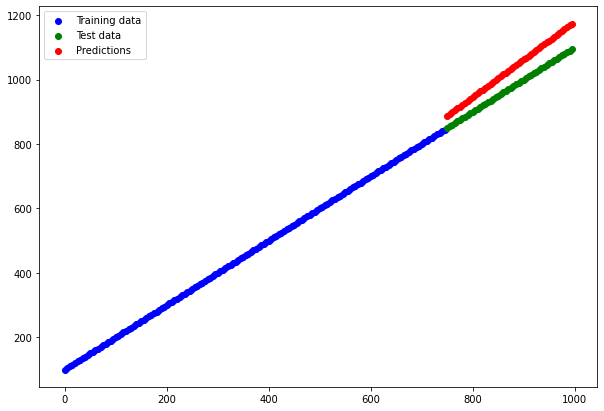

In [30]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

In [31]:
# The missing people is: Non-linearity 

#Non-linear data is not possible to model with straight lines

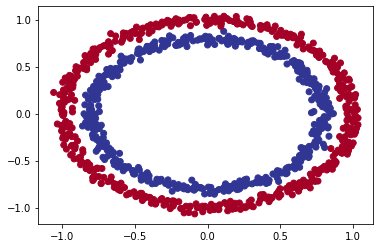

In [32]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu )

In [33]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

NameError: ignored

In [34]:
#Our model is basically saying that anything in the 'yellow' could be either blue or red... Our model is basically just guessing

In [35]:
#Let's try to build our neural network with a non-linear activation function


#Set the random seed

tf.random.set_seed(42)

#1 Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
                tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)               
])

# 2. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
                

3. #Fit the model
history = model_5.fit(X,y, epochs=100)

#Our first model with non-linear activation

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 994us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 1

In [36]:
# Tensorflow playground suggestions a solution: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.57588&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)



Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

In [38]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


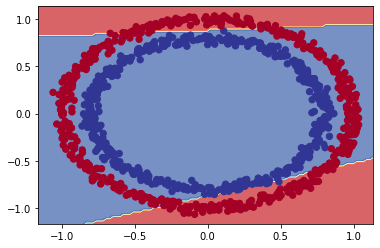

In [39]:
#We're still hitting 50% accuracy, our model is still practically as good as guessing.

#How do the predictions look?
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [40]:
#It's starting to learn that red might be towards the outside. But it's still operating with straight lines
#Ideally our yellow line would go around the circle between the red and blue

In [41]:
#The main thing that we're missing is the output activation function in the last Dense layer.
#Let's get to work!

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer - we want one for the output layer b/c we're dealing with binary - one thing or the other
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [43]:
#Wow, we're getting almost 99% accuracy now!

model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

In [44]:
#Let's not just trust the metrics - let's visualize:

doing binary classification


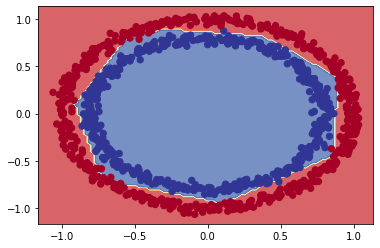

In [45]:

plot_decision_boundary(model_7, X, y)

In [46]:
#Amazing. But, What's wrong with the predictions we've made? Are we really evaluating the our model correctly? Hint: What data did the model learn on and what data did we predict on?

In [47]:
### Note: The combination of linear (straight lines) and non-linear (non-straight lines) is one of the key fundamentals of neural networks.

In [48]:
# Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [49]:
#Create a toy tensor (similar to the data we passed into our models
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

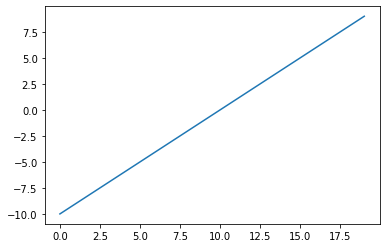

In [50]:
#Visualize our toy tensor
plt.plot(A)

In [51]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ (1 + exp(-x))

def sigmoid(x):
  return 1/ (1 + tf.exp(-x))


#Use the sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

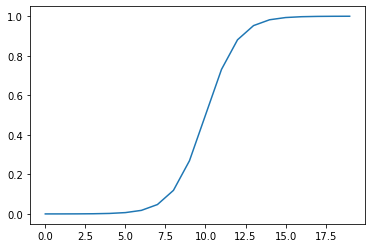

In [52]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [53]:
#This line was originally straight and has now been modified to be nonstraight
#It's like we gave our neural network a tool to say like 'you've been trying to find patterns with just straight lines before. But now we've given you a tool to use nonstraight lines!'

In [54]:
#Let's recreate the relu function
#formula from here: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

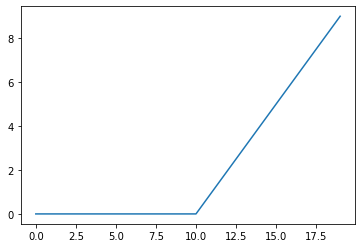

In [55]:
plt.plot(relu(A));

In [56]:
#We've given our neural network a bunch of tools. Here's a curvy line (line 69) and here's a bendy line. Let's use them to start drawing patterns in our data

In [57]:
# Well, how about TensorFlow's linear activation function?

# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [58]:
#Compare line 77 and line 66.
#The linear function leaves everything unmodified. - changes nothing!

In [59]:
#Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

#Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

#Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.

In [60]:
#How can we evaluate and improve our classification model

In [61]:
#What data did our model learn on and what data did we predict on?
#the problem is that at the moment we don't have a training or test dataset

In [62]:
#So far we've been training and testing on the same dataset...

#However, in ML this is basically a sin.
#So let's create a training and test set

In [63]:
# Check how many examples we have
len(X)
#1000 b/c we used the make_circles function at the beginning to create our data

1000

In [64]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [65]:
#Split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,   #loss = how wrong you are.    optimizer = how you should improve
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])  #line above - took one 0 out of learning rate 0.001 ---> 0.01  0.01 allows it to improve by 10 times as much with each iteration

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

#increased the learning rate by 10 but decreased the number of epochs by 4 times

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [67]:
#With a faster learning rate - we're into a much higher and better accuracy after only 8 epochs

In [68]:
#Evaluate the model on the test dataset

model_8.evaluate(X_test, y_test)  #We now have X test and y test

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

In [69]:
#Wow. Out of all of the 200 tests it got each and every one correct

doing binary classification
doing binary classification


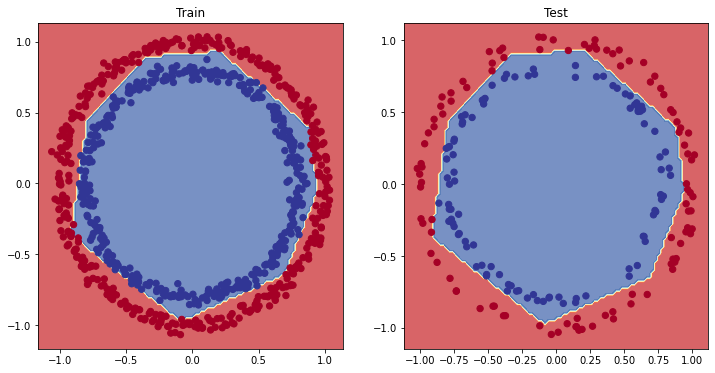

In [70]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [71]:
#The most important graph is the one on the right - the test dataset - we want our model to generalize to data that it hasn't seen before

In [72]:
#We've been saving a lot of the fits of the models as 'history'


In [73]:
#History.history tracks each of the iterations through each epoch in numberical form.
#But let's track it in visual form

# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)
#loss went down, accuracy went up

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


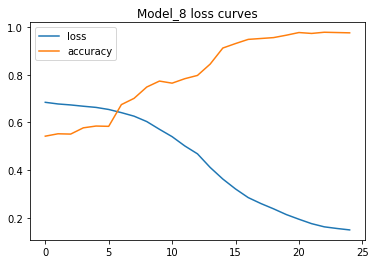

In [74]:
# Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves');

In [75]:
#This is just about the idea loss curve you'd want to see. Loss going down and accuracy going up
#Whenever we save the 'history' variable we're able to inspect our models training curves by plotting them like this
#Later we'll use tensorboard for this

In [76]:
#Sometimes we use a learning rate ('lr') of 0.001, other times 0.01. Wouldn't it be great if we had a way to determine the ideal learning rate?

In [77]:
### Finding the best learning rate

#To find the ideal learning rate (the learning rate with the loss decreases the most during training)
#A learning rate **callback**- you can think of a callback as an extra piece of functionlity, you can add to your model *while* it's training
#We'll create another model (to continue practicing)
#A modified loss curves plot.

In [78]:
#Set random seed
tf.random.set_seed(42)

#create model
model_9 = tf.keras.Sequential([
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(4, activation='relu'),               
                tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#A callback works during model training so it has to exist before model training
#So before we fit our model, let's create the call back

####Create the callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #1e-4 = 10 to the power of negative 4
#Learning rate scheduler.

#At the beginning of every epoch, this callback gets the updated learning rate
#value from schedule function provided at __init__, with the current epoch
#and current learning rate, and applies the updated learning rate
#on the optimizer.


#Fit the model(passing lr_scheduler callback)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler]) #pass in callbacks as a list because you can have many of them such as [lr_scheduler, call_back2, call_back3...]




Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

In [79]:
#Now with our learning rate scheuduler - what's it going to do every epoch? It will update the learning rate!

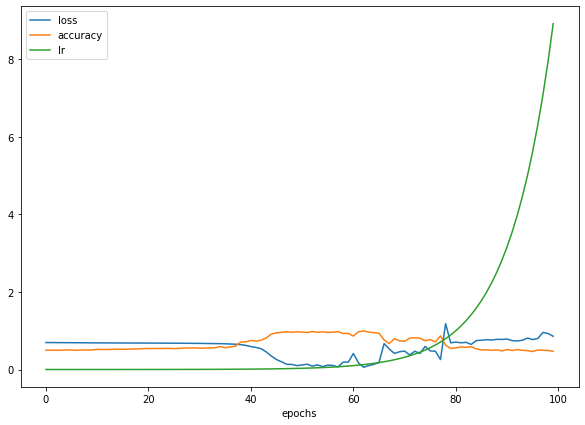

In [80]:
#Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

In [81]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))  #we replaced epochs with 100 because we set epochs to 100 above
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [82]:
#These are the 100 different learning rates that our model tried out

Text(0.5, 1.0, 'Learning rate vs Loss')

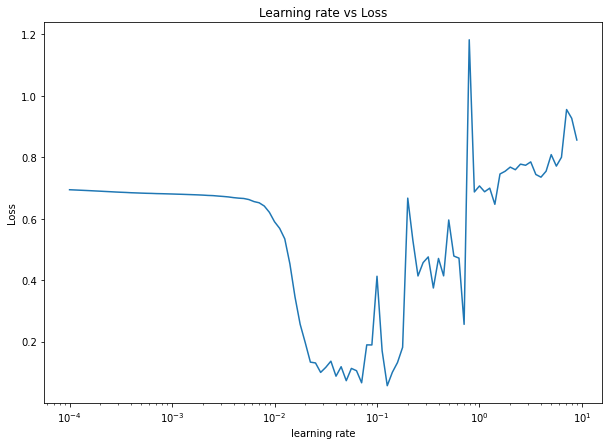

In [83]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [84]:
#With the graph above we're trying to pick a learning rate where the loss decreases the most
#The ideal lr is the value where the loss is still decreasing, but hasn't quite flattened out yet.
#So for us it's between 10-1 and 10-2 (closer to 10-2)
#Wow - 10-2 = 0.01 the same lr that we trained on earlier with the beautiful results. Lucky guess!

In [85]:
#Example of other typical learning rate values:
10**0, 10**-1, 10**-1, 10**-3, 1e-4  #all multiples of 10

(1, 0.1, 0.1, 0.001, 0.0001)

In [86]:
#we used a lr of 0.01 (10**-2) above and it gave real impressive results
#but we can see that the loss is still dramatically decreasing for about 1 more little notch...So let's try 0.02 

In [87]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,   #loss = how wrong you are.    optimizer = how you should improve
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])  #line above - took one 0 out of learning rate 0.001 ---> 0.01  0.01 allows it to improve by 10 times as much with each iteration

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [88]:
#Beautiful, it is slightly (about 1% better!)

doing binary classification
doing binary classification


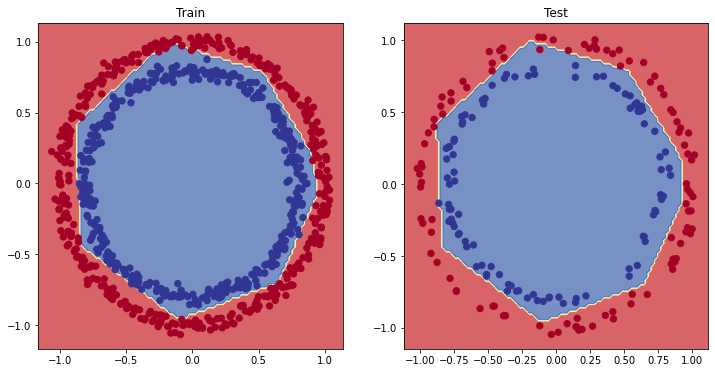

In [89]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [90]:
#We've looked at a very evaluation methods. There are a couple more that we should have in our ML toolbox

#? We've used accuracy - it's the default metric for classification problems. Not the best for imbalanced classes - so for example if you have 10,000 examples of one class and only 1,000 examples of another class
#Precision - Higher precision leads to less false positives A false positive is when someone who does not have coronavirus, tests positive for it
#Recall - higher recall leads to less false negatives - I actually have covid - but my test says that I didn't

#Unfortunately,, you can't have both precision nad recall high. If you increase precision, it will reduce recall, and vice versa. This is call the precision/recall tradeoff. see preceision/recall curve

#F1-score  - Combination of precision and recall - usually a good overall metric for a classification problem
#Confusion matrix - When comparing predictions to the truth labels to see where models gets confused - hard to use with a large number of classes


#Lastly: sklearn's classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#They good news is they all work pretty much the same: sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')[source]¶
#They all take in some true values (y_true) and they compare them to the predictions (y_pred)
#What were the true values the model should have predicted and what we the values that the value predicted - let's compare the two

In [91]:
#Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100): .2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900
 Model loss on the test set: 0.046285759657621384
Model accuracy on the test set:  99.00%


In [92]:
#What would the confusion matrix look like?

#Create a confusion matrix

from sklearn.metrics import confusion_matrix

#Make predictions    - how do we make predictions on a trained model?
y_preds = model_10.predict(X_test)

#Create our confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [93]:
#What do we do when we face errors like this?
#We inspect what we're trying to predict on

y_test[:10] #Let's look at the first 10 values of y_test   

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [94]:
y_preds[:10] #what about our preds, what do they look like?

array([[9.9731982e-01],
       [9.9994922e-01],
       [9.9534464e-01],
       [9.9503756e-01],
       [3.4947401e-01],
       [4.9839616e-03],
       [9.8462188e-01],
       [1.3034195e-02],
       [9.9993813e-01],
       [1.0629889e-04]], dtype=float32)

In [95]:
#This is why we got the above value error. Our test values are in binary form. Our predictions are in continuous form

In [96]:
#oops, looks like our predictions array has come out in prediction probability form... the standard output ffrom the sigmoid (or softmax) activation functions.
#Let's round them to their closest integer values

tf.round(y_preds)[:10]  #now they are looking much more similar to our y_test format on line 94.
#This is one of the most common challenges that you'll get to solve --- making sure everything is in the same format

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [97]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))
#Now when we run it, it works. In line 93 it didn't b/c of the float/int disparity

array([[100,   1],
       [  1,  98]])

In [98]:
#How about we prettify our confusion matrix to make it more readable?

In [99]:
#Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

#We could:

#Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
#Assess some of its predictions (through visualizations).
#Improve its accuracy (by training it for longer or changing the architecture).
#Save and export it for use in an application.
#Let's go through the first two options.

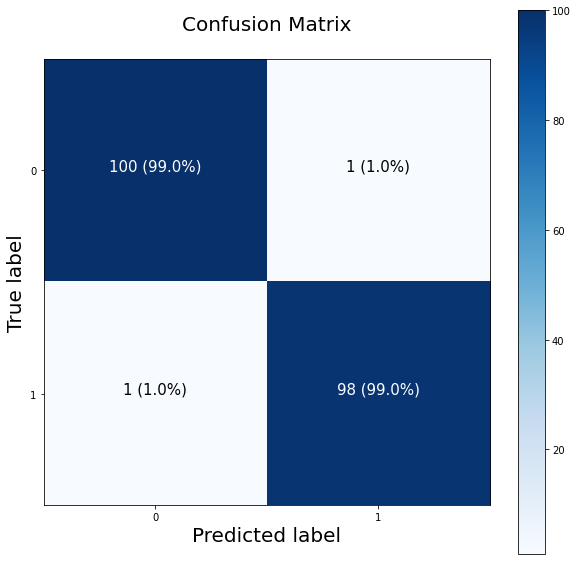

In [100]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it - this will give us percentages
# do cm_norm to see what it looks like
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html - Display an array as a matrix in a new figure window.
fig.colorbar(cax) # cax = ax.matshow(cm, cmap=plt.cm.Blues) (first cm - confusion_matrics, second cm - colormap = Blue  - don't confuse them!)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #itertools will iterate through whatever we pass it
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Working with a larger example (multiclass classification)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 Resource: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [101]:
#The good news is that we can make a few tweaks to our binary classification to make it a multiclass classification

In [102]:
### A ton of other practice examples on this site: https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [103]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [104]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [105]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

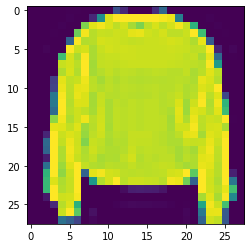

In [106]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [107]:
#Check our samples label
train_labels[7]
# 2 is a pullover - https://www.tensorflow.org/datasets/catalog/fashion_mnist

2

In [108]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [109]:
# We got to classes that we're working with. Remember, anything over 2 is 'multi-class classification'

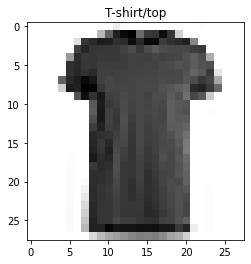

In [110]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) # change the colours to black & white - binary - black and white
plt.title(class_names[train_labels[17]]);

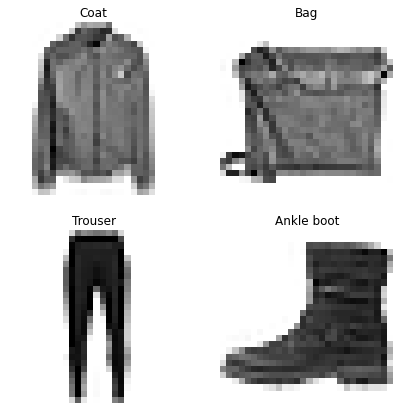

In [111]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):      #show 4 of them - randomly
  ax = plt.subplot(2, 2, i + 1)   #subplot b/c we want to plot multiple different things
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [112]:
train_data[0].shape

(28, 28)

In [113]:
len(class_names)

10

In [114]:
# Building a multi-class classification model

#For our multi-class classification model, we can use similar architecture to our binary classifiers. However we're going to need to tweak a few things:

#Input shape = 28 * 28 (the shape of one image)
#Output shape = 10 (one per class of clothing)
#Loss function = tf.keras.losses.CategoricalCrossentrophy() instead of BinaryCrossentrophy()
#Output layer activation = Softmax (not sigmoid)

In [115]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model_11 = model.add(tf.keras.layers.Dense(4))

NameError: ignored

In [116]:
'''Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.
You ready? Let's go.'''

'Alright, let\'s build a model to figure out the relationship between the pixel values and their labels.\n\nSince this is a multiclass classification problem, we\'ll need to make a few changes to our architecture (inline with Table 1 above):\n\nThe input shape will have to deal with 28x28 tensors (the height and width of our images).\nWe\'re actually going to squash the input into a tensor (vector) of shape (784).\nThe output shape will have to be 10 because we need our model to predict for 10 different classes.\nWe\'ll also change the activation parameter of our output layer to be "softmax" instead of \'sigmoid\'. As we\'ll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.\nWe\'ll need to change our loss function from a binary loss function to a multiclass loss function.\nMore specifically, since our labels a

In [117]:
#If your labels are one-hot encoded use CategoricalCrossentropy()
#If your labels are integer form, use SparseCategoricalCrossEntropy()

In [118]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us) ???
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),                  #Use Sparse (b/c integer form...???)
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [119]:

#If you get any shape errors with your models there are three things that you got to look at:

#1. Input shape - tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
#2.  Output shape - tf.keras.layers.Dense(10, activation="softmax") # output shape is 10

#and the loss function that you're using - CategoricalCrossentropy or SparseCategoricalCrossentropy()

In [120]:
#Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensor between 0 & 1.

In [121]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [122]:
#So how might we get our training data...and we'll want to do the same foor our validation data, between 0 and 1?

In [123]:
#We can get our training and testing data between 0 & 1 by dividing by the maximum (in this case 255)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#check the min and max values of the scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [124]:
#Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

#We'll use the same model as before (model_11) except this time the data will be normalized.


In [125]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 108.3327 - val_accuracy: 0.7341
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 102.6736 - val_accuracy: 0.7373
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 132.9137 - val_accuracy: 0.7042
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 150.7092 - val_accuracy: 0.7028
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 126.4341 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 118.1339 - 

In [126]:
#Wow - our val_accuracy has shot up from 0.35% to  about 70% simply by normalizing our data

In [127]:
#Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

#Let's plot each model's history (their loss curves).

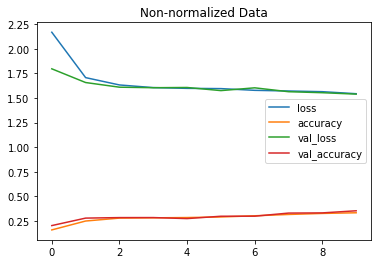

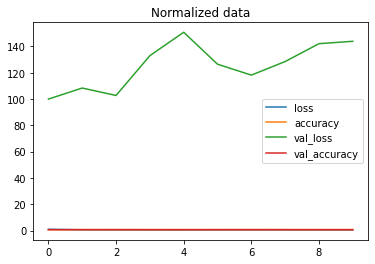

In [128]:
#Plot non-normalized data loss curves
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [129]:
#With these 2 plots we can see how much quicker the model with normalized data improved

In [130]:
#🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [131]:
#Next let's find the ideal learning rate, like we've done before
#How about we find the ideal learning rate and see what happens?

#We'll use the same architecture we've been using.


# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7058 - accuracy: 0.2488 - val_loss: 1.6514 - val_accuracy: 0.2856
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6401 - accuracy: 0.2788 - val_loss: 1.6244 - val_accuracy: 0.2739
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6185 - accuracy: 0.2823 - val_loss: 1.6034 - val_accuracy: 0.2948
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2955 - val_loss: 1.6050 - val_accuracy: 0.3221
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5908 - accuracy: 0.3097 - val_loss: 1.5778 - val_accuracy: 0.3068
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5806 - accuracy: 0.3249 - val_loss: 1.5597 - val_accuracy:

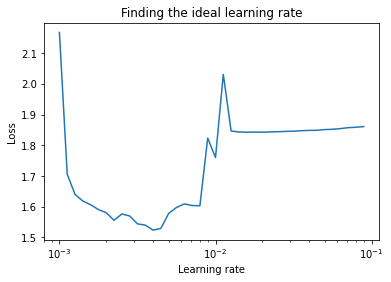

In [132]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [133]:

#In this case the ideal learning rate is btwn 10-3 and 10-2. Find the lowest point in the curve and then go back a little bit

#Let's refit a model using the ideal learning rate.

In [134]:
10**-3

0.001

In [135]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:


Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [136]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
   # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [137]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [138]:
#Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [139]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[9.0936494e-09, 5.1820731e-18, 0.0000000e+00, 1.6853881e-15,
        0.0000000e+00, 1.3929245e-01, 6.7112149e-12, 1.8733983e-01,
        2.3750332e-04, 6.7313021e-01],
       [6.6870907e-03, 1.3930045e-14, 1.2943566e-01, 6.4784056e-04,
        3.1054384e-01, 8.3491474e-04, 1.1198134e-01, 1.4826213e-04,
        4.3963763e-01, 8.3458639e-05],
       [1.0689408e-01, 6.2733388e-01, 2.0672651e-03, 2.4341372e-01,
        2.9830101e-03, 3.5897516e-05, 1.6969778e-02, 3.8529070e-06,
        2.9809723e-04, 3.5816709e-07],
       [1.0689408e-01, 6.2733388e-01, 2.0672651e-03, 2.4341372e-01,
        2.9830101e-03, 3.5897516e-05, 1.6969778e-02, 3.8529070e-06,
        2.9809723e-04, 3.5816709e-07],
       [1.2982282e-01, 9.3750958e-07, 3.0530763e-01, 5.3020723e-02,
        2.3373233e-01, 4.8743858e-04, 2.5231674e-01, 9.6085474e-05,
        2.5198067e-02, 1.7216074e-05]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [140]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [141]:
# # See the predicted class number and label for the first example
#Now let's do the same for all of the predictions.

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 8, 1, 1, 2, 1, 2, 2, 5, 7])

In [142]:
#Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [143]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[174, 131,  56, 557,  26,   0,  46,   0,  10,   0],
       [  4, 963,   3,  28,   0,   1,   0,   0,   1,   0],
       [107,   9, 368,  53, 317,   0, 121,   0,  25,   0],
       [109, 438,  26, 362,  10,   7,  47,   1,   0,   0],
       [ 64,   7, 214,  42, 570,   0,  59,   0,  44,   0],
       [  2,   1,   0,   2,   2, 846,   1,  81,   3,  62],
       [166,  24, 236, 174, 281,   0,  89,   0,  30,   0],
       [  0,   0,   0,   0,   0,  35,   0, 865,   0, 100],
       [  6,   3,  20,  10, 137,  23,   4,   2, 793,   2],
       [  0,   0,   0,   0,   0,  12,   0,  43,   1, 944]])

In [ ]:
# That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

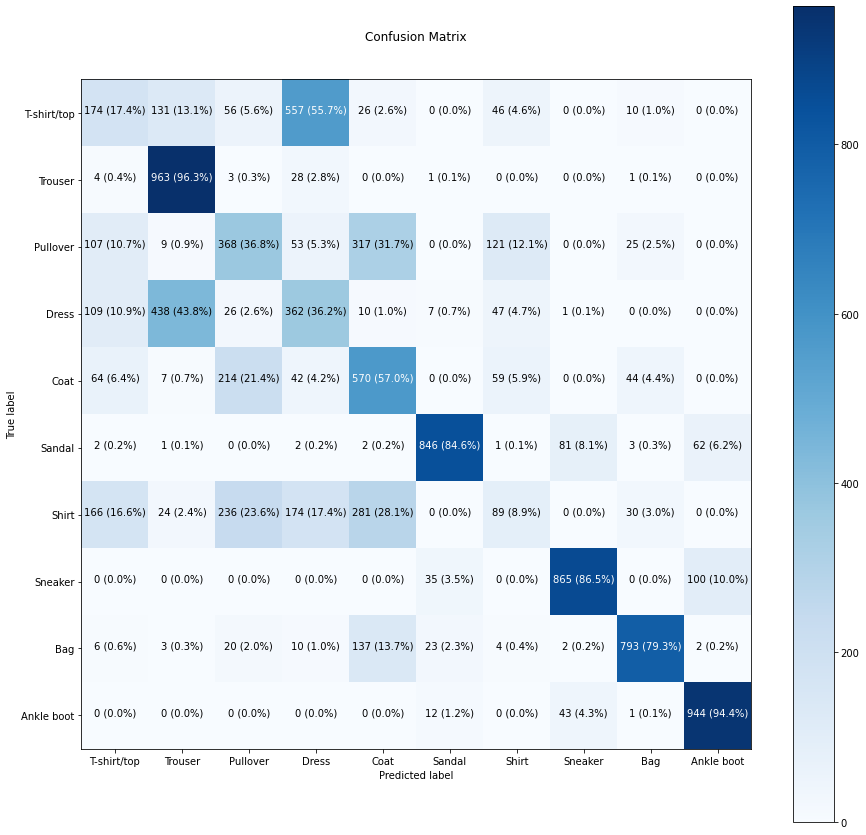

In [145]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [146]:
# It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

In [147]:
#Let's create a function to plot a random image along with its prediction.

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red



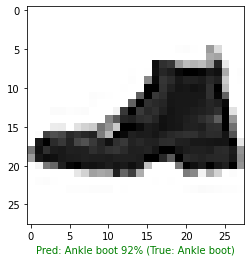

In [148]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)